In [1]:
# Imports
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from random import sample
from itertools import combinations
from statsmodels.stats.power import TTestIndPower, TTestPower
import math
import seaborn as sns
import scipy as sp
import pandas as pd
from matplotlib.lines import Line2D
import random
import statsmodels.api as sm
from itertools import combinations
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from statsmodels.stats.stattools import jarque_bera
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# creating initial data frame
df = pd.read_csv('data/kc_house_data.csv')

In [3]:
# checking original df
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [4]:
# checking for nulls
df.isna().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

In [5]:
# dropping nulls
df.dropna(inplace=True)

In [6]:
# confirming nulls dropped
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
greenbelt        0
nuisance         0
view             0
condition        0
grade            0
heat_source      0
sewer_system     0
sqft_above       0
sqft_basement    0
sqft_garage      0
sqft_patio       0
yr_built         0
yr_renovated     0
address          0
lat              0
long             0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30111 non-null  int64  
 1   date           30111 non-null  object 
 2   price          30111 non-null  float64
 3   bedrooms       30111 non-null  int64  
 4   bathrooms      30111 non-null  float64
 5   sqft_living    30111 non-null  int64  
 6   sqft_lot       30111 non-null  int64  
 7   floors         30111 non-null  float64
 8   waterfront     30111 non-null  object 
 9   greenbelt      30111 non-null  object 
 10  nuisance       30111 non-null  object 
 11  view           30111 non-null  object 
 12  condition      30111 non-null  object 
 13  grade          30111 non-null  object 
 14  heat_source    30111 non-null  object 
 15  sewer_system   30111 non-null  object 
 16  sqft_above     30111 non-null  int64  
 17  sqft_basement  30111 non-null  int64  
 18  sqft_g

In [8]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.011100e+04,3.011100e+04,30111.000000,30111.000000,30111.000000,3.011100e+04,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000
mean,4.539171e+09,1.108971e+06,3.415197,2.335708,2113.342798,1.664880e+04,1.543506,1810.389658,476.617117,330.475308,217.451264,1975.162299,90.792767,47.328482,-121.318872
std,2.882236e+09,8.965158e+05,0.979755,0.888293,973.453260,5.993303e+04,0.567789,877.726339,579.805355,285.725020,245.301991,32.052930,416.197627,1.433309,5.724073
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.070850e+09,6.492360e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405348,-122.326075
50%,3.876000e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.477000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551440,-122.225790
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2620.000000,1.056800e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669917,-122.116394
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


- categorical based on ints:
    - Bedrooms
    - bathrooms
    - floors
    - 

In [9]:
df.corr()['price'].sort_values(ascending=True)

id              -0.034096
long            -0.022278
lat              0.063430
yr_renovated     0.085023
sqft_lot         0.086550
yr_built         0.095796
floors           0.180589
sqft_basement    0.245005
sqft_garage      0.263674
bedrooms         0.288954
sqft_patio       0.313789
bathrooms        0.480337
sqft_above       0.538631
sqft_living      0.608616
price            1.000000
Name: price, dtype: float64

In [10]:
# Creating basic cat df based on dtype
df_cat = df.select_dtypes(object)

In [11]:
# viewing cat df
df_cat.head()

,date,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,address
0,5/24/2022,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC,"2102 Southeast 21st Court, Renton, Washington ..."
1,12/13/2021,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC,"11231 Greenwood Avenue North, Seattle, Washing..."
2,9/29/2021,NO,NO,NO,AVERAGE,Average,7 Average,Gas,PUBLIC,"8504 South 113th Street, Seattle, Washington 9..."
3,12/14/2021,NO,NO,NO,AVERAGE,Average,9 Better,Gas,PUBLIC,"4079 Letitia Avenue South, Seattle, Washington..."
4,8/24/2021,NO,NO,YES,NONE,Average,7 Average,Electricity,PUBLIC,"2193 Northwest Talus Drive, Issaquah, Washingt..."


- Drop ID: just a unique identifier, no helpful info
- Drop lat/long and address. Location not important in this analysis
- Drop year built (not able to change year built)


In [12]:
df_dropped = df.drop(['id', 'address', 'lat', 'long', 'yr_built'], axis = 1)

In [13]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           30111 non-null  object 
 1   price          30111 non-null  float64
 2   bedrooms       30111 non-null  int64  
 3   bathrooms      30111 non-null  float64
 4   sqft_living    30111 non-null  int64  
 5   sqft_lot       30111 non-null  int64  
 6   floors         30111 non-null  float64
 7   waterfront     30111 non-null  object 
 8   greenbelt      30111 non-null  object 
 9   nuisance       30111 non-null  object 
 10  view           30111 non-null  object 
 11  condition      30111 non-null  object 
 12  grade          30111 non-null  object 
 13  heat_source    30111 non-null  object 
 14  sewer_system   30111 non-null  object 
 15  sqft_above     30111 non-null  int64  
 16  sqft_basement  30111 non-null  int64  
 17  sqft_garage    30111 non-null  int64  
 18  sqft_p

In [14]:
df_numeric = df_dropped.drop(['bedrooms', 'bathrooms', 'floors'], axis = 1)

In [15]:
df_numeric

,date,price,sqft_living,sqft_lot,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_renovated
0,5/24/2022,675000.0,1180,7140,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC,1180,0,0,40,0
1,12/13/2021,920000.0,2770,6703,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC,1570,1570,0,240,0
2,9/29/2021,311000.0,2880,6156,NO,NO,NO,AVERAGE,Average,7 Average,Gas,PUBLIC,1580,1580,0,0,0
3,12/14/2021,775000.0,2160,1400,NO,NO,NO,AVERAGE,Average,9 Better,Gas,PUBLIC,1090,1070,200,270,0
4,8/24/2021,592500.0,1120,758,NO,NO,YES,NONE,Average,7 Average,Electricity,PUBLIC,1120,550,550,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,11/30/2021,1555000.0,1910,4000,NO,NO,NO,NONE,Good,8 Good,Oil,PUBLIC,1600,1130,0,210,0
30151,6/16/2021,1313000.0,2020,5800,NO,NO,NO,FAIR,Average,7 Average,Gas,PUBLIC,2020,0,0,520,0
30152,5/27/2022,800000.0,1620,3600,NO,NO,YES,NONE,Average,7 Average,Gas,PUBLIC,940,920,240,110,0
30153,2/24/2022,775000.0,2570,2889,NO,NO,NO,NONE,Average,8 Good,Gas,PUBLIC,1830,740,480,100,0


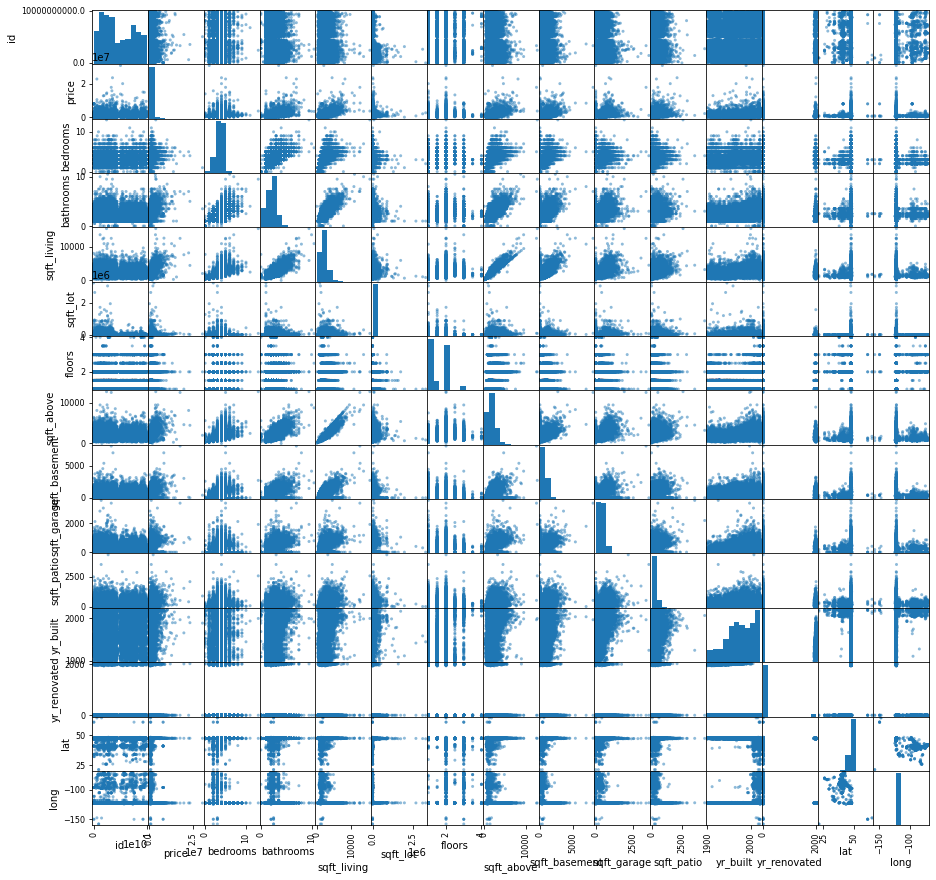

In [16]:
pd.plotting.scatter_matrix(df,figsize  = [15, 15]);

<AxesSubplot:>

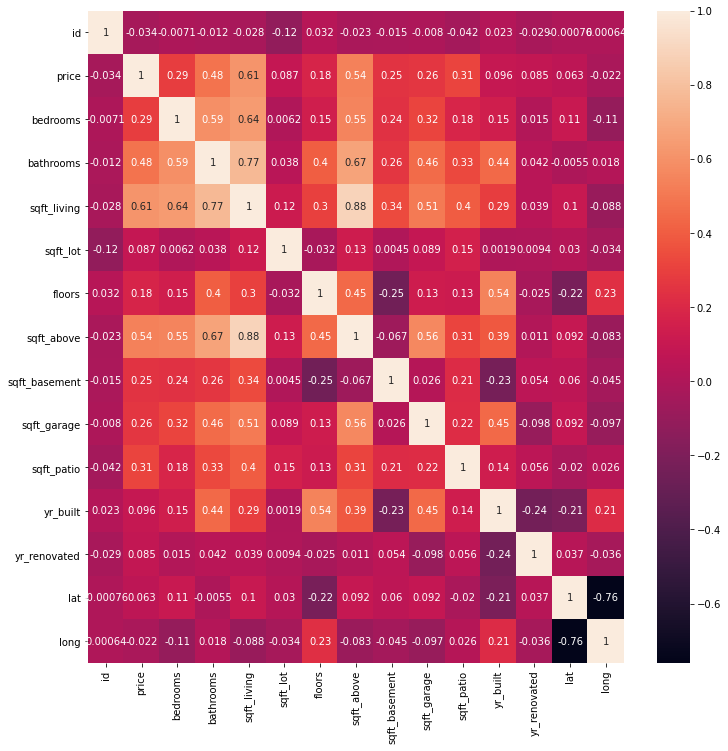

In [17]:
# Creating a heatmap visualization to look at correlations between variables
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot = True)

In [18]:
# creating baseline model based on highest .corr() to price (ran above)
X = df[['sqft_living']]
y = df['price']

model = sm.OLS(y, sm.add_constant(X)).fit()

In [19]:
# viewing the baseline model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                 1.771e+04
Date:                Thu, 08 Dec 2022   Prob (F-statistic):               0.00
Time:                        08:12:17   Log-Likelihood:            -4.4847e+05
No. Observations:               30111   AIC:                         8.969e+05
Df Residuals:                   30109   BIC:                         8.970e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.559e+04   9798.815     -7.714      0.000   -9.48e+04   -5.64e+04
sqft_living   560.5134      4.211    133.096      0.000     552.259     568.768
==============================================================================
Omnibus:                    43384.874   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         47187801.072
Skew:                           8.195   Prob(JB):                         0.00
Kurtosis:                     196.242   Cond. No.                     5.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Dropping Price outliers

In [20]:
df_no_outliers = df[(df['price'] > np.percentile(df['price'], .3)) & (df['price'] < np.percentile(df['price'], 99.7))]

In [21]:
df_no_outliers.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,2.992700e+04,2.992700e+04,29927.000000,29927.000000,29927.000000,2.992700e+04,29927.000000,29927.000000,29927.000000,29927.000000,29927.000000,29927.000000,29927.000000,29927.000000,29927.000000
mean,4.541369e+09,1.084893e+06,3.413673,2.330888,2105.252448,1.657447e+04,1.543222,1804.699368,473.342533,329.974338,215.996959,1975.169746,89.750627,47.328459,-121.321354
std,2.882145e+09,7.201688e+05,0.977299,0.877375,950.536144,5.997309e+04,0.567573,863.246578,572.185345,284.019578,242.024168,32.048907,413.920695,1.428233,5.714484
min,1.000055e+06,1.041860e+05,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.077450e+09,6.500000e+05,3.000000,2.000000,1420.000000,4.840000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.404785,-122.326340
50%,3.876002e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.460000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551305,-122.225740
75%,7.297200e+09,1.300000e+06,4.000000,3.000000,2610.000000,1.050700e+04,2.000000,2270.000000,940.000000,510.000000,312.000000,2003.000000,0.000000,47.670115,-122.116020
max,9.904000e+09,6.995000e+06,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,4520.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


In [22]:
df_dropped = df_no_outliers.drop(['id', 'address', 'lat', 'long', 'yr_built', 'date', 'waterfront', 'greenbelt', 'view', 'yr_renovated'], axis = 1)

In [23]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29927 entries, 0 to 30154
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          29927 non-null  float64
 1   bedrooms       29927 non-null  int64  
 2   bathrooms      29927 non-null  float64
 3   sqft_living    29927 non-null  int64  
 4   sqft_lot       29927 non-null  int64  
 5   floors         29927 non-null  float64
 6   nuisance       29927 non-null  object 
 7   condition      29927 non-null  object 
 8   grade          29927 non-null  object 
 9   heat_source    29927 non-null  object 
 10  sewer_system   29927 non-null  object 
 11  sqft_above     29927 non-null  int64  
 12  sqft_basement  29927 non-null  int64  
 13  sqft_garage    29927 non-null  int64  
 14  sqft_patio     29927 non-null  int64  
dtypes: float64(3), int64(7), object(5)
memory usage: 3.7+ MB


In [24]:
y= df_dropped['price']
X = df_dropped[['sqft_living', 'sqft_garage', 'sqft_patio', 'bathrooms', 'bedrooms', 'floors', 'sqft_lot', 'sqft_above']]

results = sm.OLS(endog = y, exog = sm.add_constant(X)).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     3070.
Date:                Thu, 08 Dec 2022   Prob (F-statistic):               0.00
Time:                        08:12:17   Log-Likelihood:            -4.3713e+05
No. Observations:               29927   AIC:                         8.743e+05
Df Residuals:                   29918   BIC:                         8.744e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.548e+05   1.36e+04     18.750      0.000    2.28e+05    2.81e+05
sqft_living   469.8729      9.033     52.015      0.000     452.167     487.579
sqft_garage  -199.5137     13.537    -14.738      0.000    -226.047    -172.980
sqft_patio    166.6777     14.107     11.815      0.000     139.028     194.327
bathrooms    8.199e+04   6055.913     13.538      0.000    7.01e+04    9.39e+04
bedrooms    -1.128e+05   4271.595    -26.400      0.000   -1.21e+05   -1.04e+05
floors      -5.707e+04   6827.386     -8.360      0.000   -7.05e+04   -4.37e+04
sqft_lot        0.0215      0.053      0.407      0.684      -0.082       0.125
sqft_above     84.4099      8.977      9.402      0.000      66.814     102.006
==============================================================================
Omnibus:                    14545.322   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           194981.480
Skew:                           2.003   Prob(JB):                         0.00
Kurtosis:                      14.845   Cond. No.                     2.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
vif.sort_values('VIF',ascending=False)

In [ ]:
#Setting up the formula for the vif formula with my desired independent variables
def calculate_vif(df_numerical):
    vif_df = pd.DataFrame(columns = ['Var', 'Vif'])
    x_var_names = df_numerical.columns
    for i in range(0, x_var_names.shape[0]):
        y = df_numerical[x_var_names[i]]
        x = df_numerical[x_var_names.drop([x_var_names[i]])]
        r_squared = sm.OLS(y,x).fit().rsquared
        vif = round(1/(1-r_squared),2)
        vif_df.loc[i] = [x_var_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis = 0, ascending=False, inplace=False)


In [ ]:
lm = sm.OLS(y, X).fit()
print("Coeffients: \n{0}".format(lm.params))
calculate_vif(X)

In [ ]:
#Looking at the VIF and coeffecients for sqft independents when sqft living is dropped
X.drop(['bathrooms', 'sqft_above', 'bedrooms', 'sqft_lot'], axis=1, inplace=True)
lm = sm.OLS(y, X).fit()
print("Coeffients: \n{0}".format(lm.params))
calculate_vif(X)

In [ ]:
y= df_dropped['price']
X = df_dropped[['sqft_living', 'sqft_garage', 'sqft_patio', 'bathrooms']]

results = sm.OLS(endog = y, exog = sm.add_constant(X)).fit()

results.summary()

In [ ]:
#Baseline model for comparison
X = df[['sqft_living']]
y = df['price']

model = sm.OLS(y, sm.add_constant(X)).fit()

In [ ]:
model.summary()

In [ ]:
#Scaling the independent varibales
ss = StandardScaler()

In [ ]:
ss.fit(X)

In [ ]:
X = ss.transform(X)

In [ ]:
### Best combination of sqft for highest R squared with low vim

y= df_dropped['price']
X = df_dropped[['sqft_living', 'sqft_garage', 'sqft_patio', 'bathrooms']]

results = sm.OLS(endog = y, exog = sm.add_constant(X)).fit()

results.summary()

 # Moving on to Categories

In [28]:
df_cat = df_dropped.select_dtypes(object)
df_cat[['floors', 'price']] = df_dropped[['floors', 'price']].copy()

C:\Users\12242\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [29]:
df_cat.head()

,nuisance,condition,grade,heat_source,sewer_system,floors,price
0,NO,Good,7 Average,Gas,PUBLIC,1.0,675000.0
1,YES,Average,7 Average,Oil,PUBLIC,1.0,920000.0
2,NO,Average,7 Average,Gas,PUBLIC,1.0,311000.0
3,NO,Average,9 Better,Gas,PUBLIC,2.0,775000.0
4,YES,Average,7 Average,Electricity,PUBLIC,2.0,592500.0


In [ ]:
df_all_cat_reduced = df_cat.copy()

In [31]:
def check_for_category(category_column):
    
# Check how the categories in the feature compare to the price distribution
    stats = df_all_cat_reduced.groupby([category_column])['price'].describe()
    
# Creating a chart of the column categories    
    temp_list = list(df_all_cat_reduced[category_column].unique())

    fig, ax = plt.subplots(figsize=(15,10))
    sns.stripplot(x=df_all_cat_reduced[category_column], y=df_all_cat_reduced['price'])

    colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
    colors = colors *2
    
    for i, category in enumerate(temp_list):
        z = i+1
        ax.axhline(y=df_all_cat_reduced.groupby([category_column])['price'].mean().values[i],
                   color = colors[i], label = f"{category}");
    ax.legend()

# Model the category
    y = df_numeric['price']
    X_cat = df_all_cat_reduced[[category_column]].copy()
    X_cat['sqft_living'] = df_numeric['sqft_living'].copy()
    X_cat = pd.get_dummies(X_cat, columns=[category_column], drop_first=True)

    cat_results = sm.OLS(endog = y, exog = sm.add_constant(X_cat)).fit()
    
# get a summary of the model
    cat_summary = cat_results.summary()
    return stats, cat_results, cat_summary

In [32]:
condition_stats, condition_results, condition_summary = simple_test.base_check_for_category(df_cat, 'condition')

NameError: name 'simple_test' is not defined

In [37]:
vif=pd.DataFrame()

In [38]:
vif['feature'] = df_numeric.columns

In [39]:
vif["VIF"] = [variance_inflation_factor(df_numeric.values, i)
                          for i in range(len(df_numeric.columns))]

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''